## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9743075	total: 57.1ms	remaining: 57s
1:	learn: 0.9570958	total: 58.2ms	remaining: 29s
2:	learn: 0.9383624	total: 59.2ms	remaining: 19.7s
3:	learn: 0.9204746	total: 60.1ms	remaining: 15s
4:	learn: 0.9032879	total: 61ms	remaining: 12.1s
5:	learn: 0.8877506	total: 62.2ms	remaining: 10.3s
6:	learn: 0.8718828	total: 63.4ms	remaining: 8.99s
7:	learn: 0.8553883	total: 64.3ms	remaining: 7.97s
8:	learn: 0.8406763	total: 65.2ms	remaining: 7.18s
9:	learn: 0.8247568	total: 66.1ms	remaining: 6.55s
10:	learn: 0.8110518	total: 67ms	remaining: 6.02s
11:	learn: 0.7963947	total: 67.9ms	remaining: 5.59s
12:	learn: 0.7820966	total: 68.8ms	remaining: 5.22s
13:	learn: 0.7675474	total: 69.8ms	remaining: 4.91s
14:	learn: 0.7555453	total: 70.7ms	remaining: 4.64s
15:	learn: 0.7421759	total: 71.5ms	remaining: 4.4s
16:	learn: 0.7300033	total: 72.3ms	remaining: 4.18s
17:	learn: 0.7179594	total: 73.1ms	remaining: 3.99s
18:	learn: 0.7059643	total: 73.8ms	remaining: 3.81s
19:

53:	learn: 0.4482351	total: 103ms	remaining: 1.8s
54:	learn: 0.4431317	total: 104ms	remaining: 1.78s
55:	learn: 0.4394209	total: 105ms	remaining: 1.76s
56:	learn: 0.4360574	total: 105ms	remaining: 1.74s
57:	learn: 0.4317391	total: 106ms	remaining: 1.72s
58:	learn: 0.4280279	total: 107ms	remaining: 1.71s
59:	learn: 0.4236708	total: 108ms	remaining: 1.69s
60:	learn: 0.4192258	total: 109ms	remaining: 1.67s
61:	learn: 0.4151710	total: 109ms	remaining: 1.65s
62:	learn: 0.4124008	total: 110ms	remaining: 1.64s
63:	learn: 0.4088050	total: 111ms	remaining: 1.62s
64:	learn: 0.4044883	total: 112ms	remaining: 1.61s
65:	learn: 0.4011122	total: 113ms	remaining: 1.59s
66:	learn: 0.3976171	total: 113ms	remaining: 1.58s
67:	learn: 0.3941183	total: 114ms	remaining: 1.57s
68:	learn: 0.3906647	total: 115ms	remaining: 1.55s
69:	learn: 0.3884138	total: 116ms	remaining: 1.54s
70:	learn: 0.3855683	total: 117ms	remaining: 1.53s
71:	learn: 0.3824351	total: 118ms	remaining: 1.52s
72:	learn: 0.3797883	total: 119m

154:	learn: 0.2528823	total: 190ms	remaining: 1.04s
155:	learn: 0.2520229	total: 191ms	remaining: 1.03s
156:	learn: 0.2508500	total: 192ms	remaining: 1.03s
157:	learn: 0.2498188	total: 193ms	remaining: 1.03s
158:	learn: 0.2488187	total: 194ms	remaining: 1.02s
159:	learn: 0.2480477	total: 194ms	remaining: 1.02s
160:	learn: 0.2474324	total: 195ms	remaining: 1.02s
161:	learn: 0.2467341	total: 196ms	remaining: 1.01s
162:	learn: 0.2461461	total: 197ms	remaining: 1.01s
163:	learn: 0.2454499	total: 198ms	remaining: 1.01s
164:	learn: 0.2447375	total: 199ms	remaining: 1s
165:	learn: 0.2441151	total: 200ms	remaining: 1s
166:	learn: 0.2434682	total: 200ms	remaining: 1s
167:	learn: 0.2424108	total: 201ms	remaining: 997ms
168:	learn: 0.2417998	total: 202ms	remaining: 995ms
169:	learn: 0.2411517	total: 203ms	remaining: 993ms
170:	learn: 0.2401444	total: 204ms	remaining: 991ms
171:	learn: 0.2395071	total: 205ms	remaining: 988ms
172:	learn: 0.2388804	total: 206ms	remaining: 985ms
173:	learn: 0.2382008

272:	learn: 0.1837351	total: 293ms	remaining: 780ms
273:	learn: 0.1832958	total: 294ms	remaining: 779ms
274:	learn: 0.1827571	total: 295ms	remaining: 778ms
275:	learn: 0.1824131	total: 296ms	remaining: 776ms
276:	learn: 0.1819517	total: 297ms	remaining: 774ms
277:	learn: 0.1814582	total: 297ms	remaining: 772ms
278:	learn: 0.1809462	total: 298ms	remaining: 771ms
279:	learn: 0.1805559	total: 299ms	remaining: 770ms
280:	learn: 0.1801445	total: 300ms	remaining: 768ms
281:	learn: 0.1798992	total: 301ms	remaining: 767ms
282:	learn: 0.1795960	total: 302ms	remaining: 765ms
283:	learn: 0.1792007	total: 303ms	remaining: 764ms
284:	learn: 0.1789563	total: 304ms	remaining: 762ms
285:	learn: 0.1785784	total: 304ms	remaining: 760ms
286:	learn: 0.1781562	total: 305ms	remaining: 758ms
287:	learn: 0.1777278	total: 306ms	remaining: 757ms
288:	learn: 0.1775970	total: 307ms	remaining: 756ms
289:	learn: 0.1772246	total: 309ms	remaining: 756ms
290:	learn: 0.1767091	total: 310ms	remaining: 755ms
291:	learn: 

371:	learn: 0.1485216	total: 381ms	remaining: 644ms
372:	learn: 0.1484300	total: 382ms	remaining: 643ms
373:	learn: 0.1481713	total: 383ms	remaining: 641ms
374:	learn: 0.1477889	total: 384ms	remaining: 640ms
375:	learn: 0.1474831	total: 385ms	remaining: 639ms
376:	learn: 0.1472315	total: 386ms	remaining: 638ms
377:	learn: 0.1469342	total: 387ms	remaining: 637ms
378:	learn: 0.1465947	total: 388ms	remaining: 636ms
379:	learn: 0.1461608	total: 389ms	remaining: 634ms
380:	learn: 0.1457707	total: 390ms	remaining: 633ms
381:	learn: 0.1454746	total: 390ms	remaining: 632ms
382:	learn: 0.1452193	total: 391ms	remaining: 630ms
383:	learn: 0.1450306	total: 392ms	remaining: 629ms
384:	learn: 0.1448692	total: 393ms	remaining: 628ms
385:	learn: 0.1446399	total: 394ms	remaining: 626ms
386:	learn: 0.1442021	total: 395ms	remaining: 625ms
387:	learn: 0.1440961	total: 395ms	remaining: 624ms
388:	learn: 0.1437930	total: 396ms	remaining: 622ms
389:	learn: 0.1435142	total: 397ms	remaining: 621ms
390:	learn: 

491:	learn: 0.1181330	total: 483ms	remaining: 499ms
492:	learn: 0.1179991	total: 484ms	remaining: 498ms
493:	learn: 0.1178072	total: 485ms	remaining: 497ms
494:	learn: 0.1177835	total: 486ms	remaining: 496ms
495:	learn: 0.1176049	total: 487ms	remaining: 495ms
496:	learn: 0.1174037	total: 488ms	remaining: 494ms
497:	learn: 0.1172810	total: 489ms	remaining: 492ms
498:	learn: 0.1171262	total: 490ms	remaining: 491ms
499:	learn: 0.1169281	total: 490ms	remaining: 490ms
500:	learn: 0.1167429	total: 491ms	remaining: 489ms
501:	learn: 0.1165747	total: 492ms	remaining: 488ms
502:	learn: 0.1164141	total: 493ms	remaining: 487ms
503:	learn: 0.1160687	total: 494ms	remaining: 486ms
504:	learn: 0.1160436	total: 494ms	remaining: 485ms
505:	learn: 0.1158470	total: 495ms	remaining: 483ms
506:	learn: 0.1157642	total: 496ms	remaining: 482ms
507:	learn: 0.1156761	total: 497ms	remaining: 481ms
508:	learn: 0.1154648	total: 498ms	remaining: 480ms
509:	learn: 0.1152836	total: 498ms	remaining: 479ms
510:	learn: 

596:	learn: 0.1005110	total: 572ms	remaining: 386ms
597:	learn: 0.1004859	total: 573ms	remaining: 385ms
598:	learn: 0.1004223	total: 573ms	remaining: 384ms
599:	learn: 0.1003847	total: 574ms	remaining: 383ms
600:	learn: 0.1002509	total: 576ms	remaining: 382ms
601:	learn: 0.1000610	total: 576ms	remaining: 381ms
602:	learn: 0.0999698	total: 577ms	remaining: 380ms
603:	learn: 0.0997459	total: 578ms	remaining: 379ms
604:	learn: 0.0997039	total: 579ms	remaining: 378ms
605:	learn: 0.0995217	total: 580ms	remaining: 377ms
606:	learn: 0.0994019	total: 581ms	remaining: 376ms
607:	learn: 0.0992297	total: 581ms	remaining: 375ms
608:	learn: 0.0990222	total: 582ms	remaining: 374ms
609:	learn: 0.0988070	total: 583ms	remaining: 373ms
610:	learn: 0.0986544	total: 584ms	remaining: 372ms
611:	learn: 0.0984848	total: 585ms	remaining: 371ms
612:	learn: 0.0983344	total: 585ms	remaining: 370ms
613:	learn: 0.0981624	total: 586ms	remaining: 369ms
614:	learn: 0.0980226	total: 587ms	remaining: 367ms
615:	learn: 

718:	learn: 0.0837913	total: 673ms	remaining: 263ms
719:	learn: 0.0837429	total: 674ms	remaining: 262ms
720:	learn: 0.0835526	total: 675ms	remaining: 261ms
721:	learn: 0.0835185	total: 676ms	remaining: 260ms
722:	learn: 0.0833890	total: 676ms	remaining: 259ms
723:	learn: 0.0832916	total: 677ms	remaining: 258ms
724:	learn: 0.0832750	total: 678ms	remaining: 257ms
725:	learn: 0.0830847	total: 679ms	remaining: 256ms
726:	learn: 0.0829311	total: 680ms	remaining: 255ms
727:	learn: 0.0827368	total: 681ms	remaining: 254ms
728:	learn: 0.0825560	total: 681ms	remaining: 253ms
729:	learn: 0.0824712	total: 682ms	remaining: 252ms
730:	learn: 0.0823773	total: 683ms	remaining: 251ms
731:	learn: 0.0822340	total: 684ms	remaining: 250ms
732:	learn: 0.0821319	total: 685ms	remaining: 249ms
733:	learn: 0.0820016	total: 686ms	remaining: 248ms
734:	learn: 0.0818240	total: 686ms	remaining: 247ms
735:	learn: 0.0816737	total: 687ms	remaining: 247ms
736:	learn: 0.0815220	total: 688ms	remaining: 245ms
737:	learn: 

822:	learn: 0.0724392	total: 762ms	remaining: 164ms
823:	learn: 0.0723334	total: 763ms	remaining: 163ms
824:	learn: 0.0722296	total: 764ms	remaining: 162ms
825:	learn: 0.0720932	total: 765ms	remaining: 161ms
826:	learn: 0.0719587	total: 766ms	remaining: 160ms
827:	learn: 0.0718311	total: 767ms	remaining: 159ms
828:	learn: 0.0717981	total: 768ms	remaining: 158ms
829:	learn: 0.0716918	total: 769ms	remaining: 157ms
830:	learn: 0.0715618	total: 770ms	remaining: 157ms
831:	learn: 0.0714309	total: 771ms	remaining: 156ms
832:	learn: 0.0712607	total: 772ms	remaining: 155ms
833:	learn: 0.0711384	total: 773ms	remaining: 154ms
834:	learn: 0.0710184	total: 774ms	remaining: 153ms
835:	learn: 0.0709888	total: 774ms	remaining: 152ms
836:	learn: 0.0709106	total: 775ms	remaining: 151ms
837:	learn: 0.0708196	total: 776ms	remaining: 150ms
838:	learn: 0.0707790	total: 777ms	remaining: 149ms
839:	learn: 0.0707301	total: 778ms	remaining: 148ms
840:	learn: 0.0706411	total: 779ms	remaining: 147ms
841:	learn: 

932:	learn: 0.0621265	total: 862ms	remaining: 61.9ms
933:	learn: 0.0620661	total: 863ms	remaining: 61ms
934:	learn: 0.0619607	total: 864ms	remaining: 60.1ms
935:	learn: 0.0618183	total: 865ms	remaining: 59.2ms
936:	learn: 0.0616717	total: 866ms	remaining: 58.2ms
937:	learn: 0.0616259	total: 867ms	remaining: 57.3ms
938:	learn: 0.0615318	total: 868ms	remaining: 56.4ms
939:	learn: 0.0614934	total: 869ms	remaining: 55.4ms
940:	learn: 0.0614026	total: 869ms	remaining: 54.5ms
941:	learn: 0.0613116	total: 870ms	remaining: 53.6ms
942:	learn: 0.0612286	total: 871ms	remaining: 52.7ms
943:	learn: 0.0611391	total: 872ms	remaining: 51.7ms
944:	learn: 0.0611299	total: 873ms	remaining: 50.8ms
945:	learn: 0.0610818	total: 874ms	remaining: 49.9ms
946:	learn: 0.0609824	total: 875ms	remaining: 49ms
947:	learn: 0.0608668	total: 876ms	remaining: 48ms
948:	learn: 0.0608081	total: 876ms	remaining: 47.1ms
949:	learn: 0.0606691	total: 877ms	remaining: 46.2ms
950:	learn: 0.0606297	total: 878ms	remaining: 45.2ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

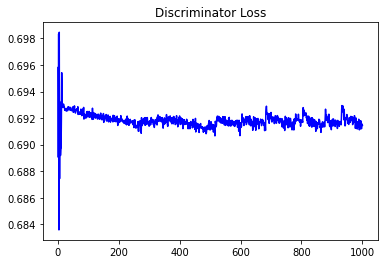

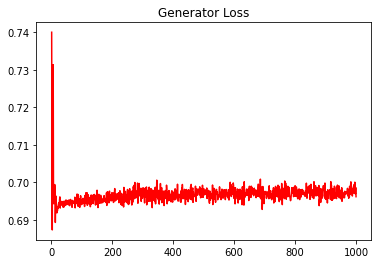

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09578210339750129


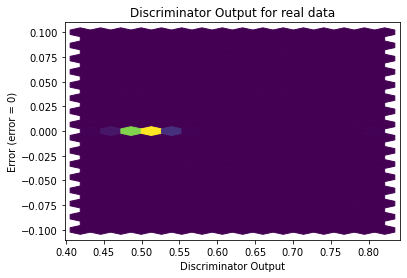

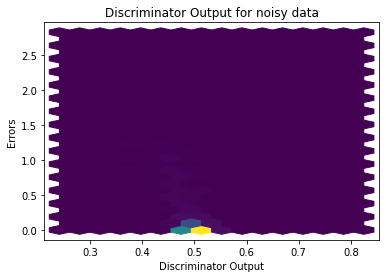

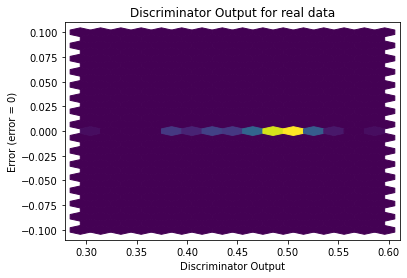

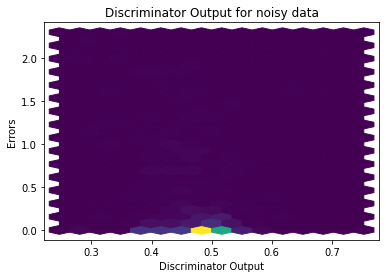

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


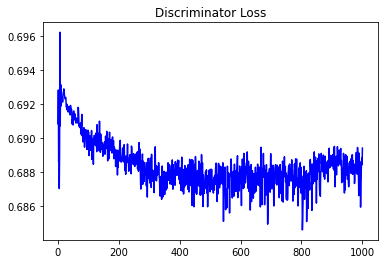

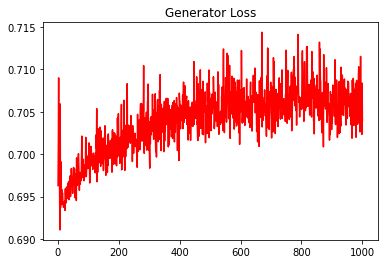

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1271066386767596


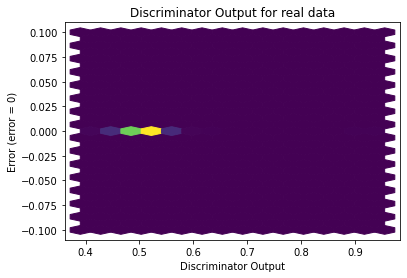

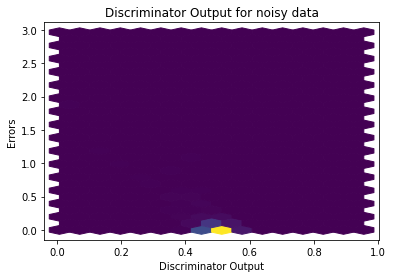

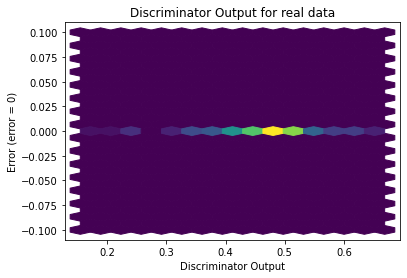

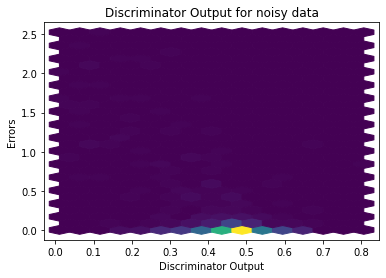

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9869]], requires_grad=True)
